# Análise de Dados - ENEM 2019

### <a name=indice>Índice</a>

* [Introdução](#introducao)
* [Tema Abordado](#tema)
* [Desenvolvimento](#desenvolvimento)
* [Hipóteses](#hipoteses)
* [Conclusão](#conclusao)
* [Referências](#referencias)

### <a name=introducao>Introdução</a>
[Voltar ao índice](#indice)

O ENEM é uma avaliação foi criada em 1998 e é realizada anualmente. Desde que foi criado passou por diversas mudanças, tanto na forma de aplicação como em sua estrutura e utilização pelas instituições de ensino superior.
<br>De acordo com INEP¹, o ENEM tem como principal objetivo aferir se os participantes demonstram ao fim do ensino médio domínio dos princípios científicos, tecnológicos e formas contemporâneas de linguagem.
<br>
<br>Os resultados dos exames são importantes para:
<br>
* Os candidatos autoavaliarem seu desempenho;
* Criar uma referência nacional para os currículos do ensino médio;
* Utilizar um mecanismo principal para acesso à educação superior;
* Fornecer subsidio para programas de financiamento governamental e apoio ao estudante;
* Utilização como instrumento de seleção para setores do mercado de trabalho;
* Desenvolvimento de estudos e indicadores sobre a educação brasileira.


Pensando no desenvolvimento de estudos sobre o tema, o INEP divulga anualmente dados referentes à edição do ENEM.
<br>Para este estudo serão utilizados os dados divulgados da edição de 2019, sendo os principais arquivos:
- MICRODADOS_ENEM_2019.csv
<br>(Informações gerais sobre a realização das provas, a caracterização do participante e da escola que ele declarou ter frequentado, e as notas das provas objetivas e da redação);
- ITENS_PROVA_2019.csv
<br>(Informações gerais sobre os itens das provas);
- Dicionário_Microdados_Enem_2019.xlsx
<br>(Informações gerais sobre as variáveis contidas nas bases e sobre as perguntas e alternativas do questionário aplicado);
- Leia-me_Enem_2019.pdf
<br>(Breve descrição do Enem, bem como das informações sobre as bases e os arquivos disponibilizados nos Microdados);
- Matriz_referencia_enem.pdf
<br>(Apresentação da Matriz de Referência, que compreende os eixos cognitivos, as competências e as habilidades avaliadas em cada área do conhecimento do Ensino Médio).

É importante saber que as provas do ENEM são realizadas em dois dias, sendo que no primeiro dia são feitas as provas de ciências humanas, linguagem e códigos e a redação e no segundo dia são feitas as provas de ciências da natureza e matemática.

### <a name=tema>Tema abordado</a>
[Voltar ao índice](#indice)

A ideia principal deste estudo é fazer uma análise de desempenho dos participantes, trazer hipóteses sobre as características dos alunos e como isso pode impactar nos resultados obtidos.

Serão trazidas ferramentas estatísticas, bem como métodos quantitativos e qualitativos de análise para o conjunto de dados. 

### <a name=desenvolvimento>Desenvolvimento</a>
[Voltar ao índice](#indice)

Para iniciar o estudo, serão importadas as bases de dados e as bibliotecas que serão utilizadas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
from sklearn import tree
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_columns', None,'display.max_rows',None,'display.float_format', lambda x: '%.2f' % x)

De acordo com o "Dicionário_Microdados_Enem_2019", o arquivo contendo os dados "ITENS_PROVA_2019" trazem as informações sobre a posição dos itens na prova, a área do conhecimento de que trata, código do item, gabarito, habilidade do item, cor da prova, identificador da prova, qual escolha de língua estrangeira e se o item pertence à prova adaptada.
<br>O foco desse estudo será direcionado ao desempenho dos alunos e a relação com as suas características declaradas na prova, então o material referente aos dados da prova não será utilizado. 
<br>Vale ressaltar que a base de dados "MICRODADOS_ENEM_2019" traz todas as escolhas de cada inscrito e as informações socioeconômicas do participante, então não serão perdidas informações.

Para cada análise específica será utilizada uma parte da base de dados contendo as colunas que forem necessárias para tal estudo, buscando reduzir o tamanho da base original e utilizar menos recursos computacionais.

Apenas para efeito de facilitar a visualização da tabela completa, as primeiras 100 linhas contendo todas as colunas serão importadas no dataframe "microdados". 

In [2]:
microdados = dd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    sep=";",
    encoding='latin-1',
    dtype={'CO_MUNICIPIO_NASCIMENTO': 'float64',
       'CO_UF_NASCIMENTO': 'float64',
       'NO_MUNICIPIO_ESC': 'object',
       'SG_UF_ESC': 'object'}
)


In [3]:
microdados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36,M,1,3,1,2914802.00,Itabuna,29.00,BA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23,M,1,1,1,2910800.00,Feira de Santana,29.00,BA,1,5,1,1.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39,F,1,3,1,2304400.00,Fortaleza,23.00,CE,1,13,1,1.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25,F,1,1,1,1721000.00,Palmas,17.00,TO,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1721000,Palmas,17,TO,1,1,1,1,504.00,510.00,513.00,516.00,483.80,503.60,537.30,392.00,BACCEEBEECDBEDDAEECDEDEADEBBCDBCAACADEEACCBBD,AECEDADAABAADBAADAEBACBAECCDAEADCDBBECCEDABCD,99999AAABEBBCCBDCAEECADBACAADAECCCDCCBAEBDEEEA...,DDBBBBCDCCDCAECCBBECDAEBADCD..CABCCECAEBDBBDA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22,F,1,1,1,3118601.00,Contagem,31.00,MG,1,4,1,1.00,0,NaN,NaN,NaN,NaN,N

In [4]:
microdados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=136)

In [5]:
len(microdados)

5095270

É possível observar que são 136 colunas, sendo que algumas são informações similares (código do estado e sigla do estado).

Para trazer uma primeira ideia geral dos inscritos, será criada uma base de dados contendo as informações de: 
- número de inscrição (NU_INSCRICAO); 
- nome do município de residência(NO_MUNICIPIO_RESIDENCIA); 
- sigla do estado do município de residência(SG_UF_RESIDENCIA);
- idade(NU_IDADE);
- sexo(TP_SEXO);
- estado civil(TP_ESTADO_CIVIL);
- cor/raça(TP_COR_RACA);
- nacionalidade(TP_NACIONALIDADE);
- situação de conclusão do ensino médio(TP_ST_CONCLUSAO);
- tipo de escola que frequenta ou frequentou(TP_ESCOLA);
- tipo de ensino(TP_ENSINO).

In [6]:
colunas=[
    'NU_INSCRICAO',
    'NO_MUNICIPIO_RESIDENCIA',
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'TP_ST_CONCLUSAO',
    'TP_ESCOLA',
    'TP_ENSINO'
]

In [7]:
inscritos = dd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    sep=";",
    encoding='latin-1',
    usecols=colunas,
    dtype={
    'NU_INSCRICAO':'int64',
    'NO_MUNICIPIO_RESIDENCIA':'object',
    'SG_UF_RESIDENCIA':'string',
    'NU_IDADE':'float64',
    'TP_SEXO':'category',
    'TP_ESTADO_CIVIL':'category',
    'TP_COR_RACA':'category',
    'TP_NACIONALIDADE':'object',
    'TP_ST_CONCLUSAO':'category',
    'TP_ESCOLA':'category',
    'TP_ENSINO':'category'})

In [8]:
inscritos.describe(include="all").compute()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO
unique,NaN,5299,27,NaN,2,5,6,5,4,3,2
count,5095270.00,5095270,5095270,5095201.00,5095270,5095270,5095270,5095270,5095270,5095270,2878197
top,NaN,São Paulo,SP,NaN,F,1,3,1,1,1,1
freq,NaN,229837,813772,NaN,3031822,4398485,2364063,4950021,2992921,3629376,2864398
mean,190003552378.32,NaN,NaN,22.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1471022.58,NaN,NaN,7.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,190001004627.00,NaN,NaN,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,190002574602.00,NaN,NaN,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,190004072417.00,NaN,NaN,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,190005676982.50,NaN,NaN,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De maneira geral, podemos ver as estatísticas básicas das variaveis selecionadas. É possível observar que houve mais de 5 milhões de escritos em 5299 municípios dos 26 estados e distrito federal. Houve mais mulheres do que homens, mais solteiros, raça/cor parda, que já concluiram o ensino médio de ensino regular. A idade média dos participantes foi de 22 anos, sendo o mais jovem a participar com 10 anos e o mais idoso com 94 anos.
<br>Como a resposta mais frequente com relação ao tipo de escola é que o aluno não respondeu, é interessante abrir esse dado para ver com mais detalhes.

In [9]:
tipo_escola = dd.Series.value_counts(inscritos['TP_ESCOLA']).compute()

In [10]:
print(tipo_escola)

1    3629376
2    1247262
3     218632
Name: TP_ESCOLA, dtype: int64


É possível observar que dos alunos que responderam, a maior parte veio de escola pública(1=não respondeu, 2=escola pública, 3=escola privada).

Um outro ponto importante é ver a distribuição dos alunos pelos estados.

In [11]:
estados = inscritos['SG_UF_RESIDENCIA'].unique().compute()

In [12]:
alunos_estado=dd.Series.value_counts(inscritos['SG_UF_RESIDENCIA']).compute()

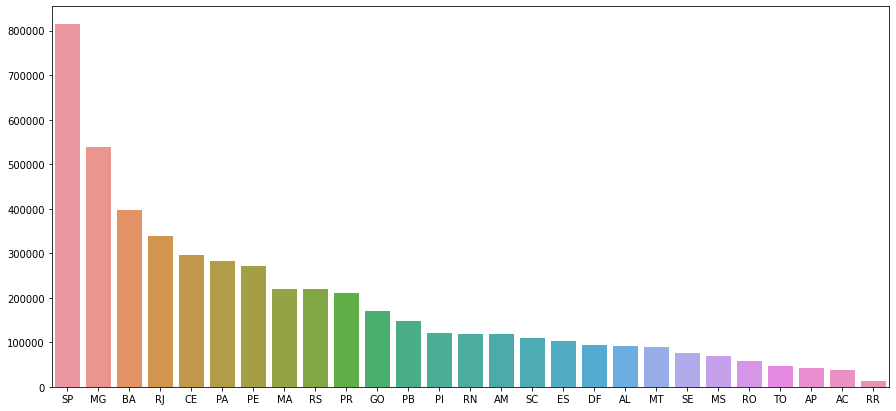

In [13]:
plt.figure(figsize=(15,7))
sns.barplot(x=list(dict(alunos_estado).keys()), y= list(dict(alunos_estado).values()))
plt.show()

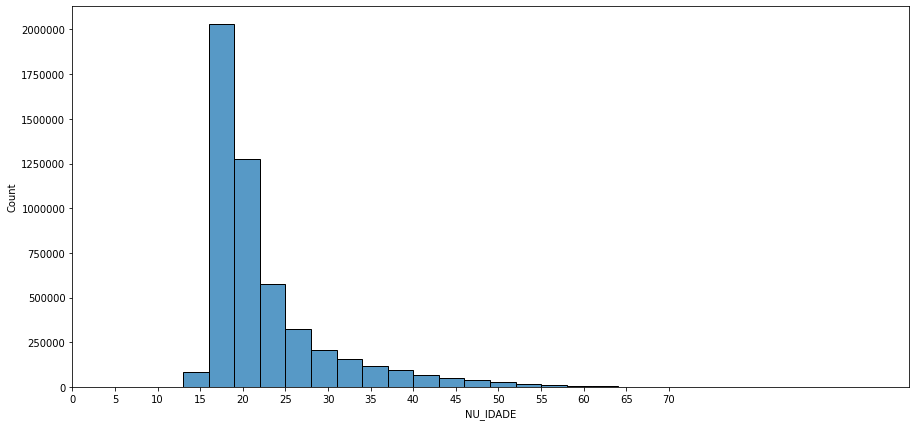

In [14]:
plt.figure(figsize=(15,7))
g=sns.histplot(data=inscritos,x='NU_IDADE',binwidth=3)
plt.ticklabel_format(style='plain',axis='y',useOffset=False)
plt.xticks(list(range(0,75,5)))
plt.show()

Observando a distribuição da idade, podemos ver que a maioria dos alunos está entre 15 e 25 anos.

A seguir, observando a distribuição de idade dos participantes considerando o sexo, é possível notar algumas diferenças sensíveis.

In [15]:
alunos_sexo = inscritos[['NU_IDADE','TP_SEXO']]

In [16]:
alunos_sexo_agg = alunos_sexo.groupby(by=['NU_IDADE','TP_SEXO'])['NU_IDADE'].agg(['count']).compute()

In [17]:
alunos_sexo_agg_pivot = alunos_sexo_agg.pivot_table(index='NU_IDADE',columns='TP_SEXO',values='count')

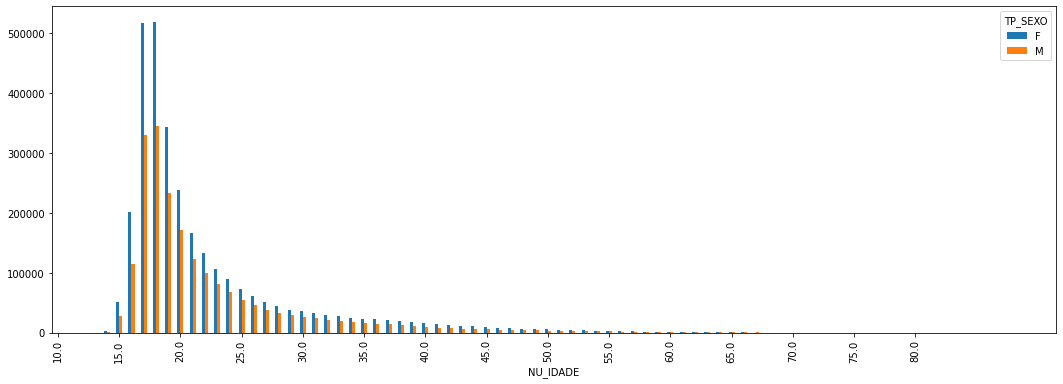

In [18]:
alunos_sexo_agg_pivot.plot.bar(figsize=(18,6))
plt.xticks(list(range(0,75,5)))
plt.show()

Quando separamos a distribuição de mulheres e homens por idade, é possível observar que a quantidade de mulheres é significativamente maior na faixa de 15 à 25 anos.

Nos próximos passos, será verificado o desempenho com relação à alguns fatores.

In [19]:
colunas_alunos=[
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_ESCOLA',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'TP_PRESENCA_MT'
]

In [20]:
alunos=dd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    sep=";",
    encoding='latin-1',
    usecols=colunas_alunos,
    dtype={
    'SG_UF_RESIDENCIA':'string',
    'NU_IDADE':'float64',
    'TP_SEXO':'category',
    'TP_COR_RACA':'category',
    'TP_ESCOLA':'category',
    'NU_NOTA_CN':'float64',
    'NU_NOTA_CH':'float64',
    'NU_NOTA_LC':'float64',
    'NU_NOTA_MT':'float64',
    'NU_NOTA_REDACAO':'float64',
    'TP_PRESENCA_CN':'category',
    'TP_PRESENCA_CH':'category',
    'TP_PRESENCA_LC':'category',
    'TP_PRESENCA_MT':'category'
    })

In [21]:
colunas_alunos

['SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_ESCOLA',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_REDACAO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT']

Neste ponto, decidiu-se remover os alunos que tivessem nota 0 em todas as provas.

In [22]:
presentes=alunos.dropna(how='all',subset=['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'])

In [23]:
alunos_notas =presentes[['SG_UF_RESIDENCIA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']] 

Calculando a média do aluno como a média aritmética de todas as notas temos:

In [24]:
alunos_notas['media'] = alunos_notas[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)

In [25]:
alunos_notas_final=alunos_notas.groupby(by=['SG_UF_RESIDENCIA'])['media'].agg(['mean']).compute()

In [26]:
alunos_notas_final

,mean
SG_UF_RESIDENCIA,
AC,488.60
AL,499.56
AM,483.35
AP,485.39
BA,504.10
CE,511.29
DF,533.35
ES,531.36
GO,519.72


In [27]:
alunos_notas_final=alunos_notas_final.reset_index().sort_values(by=['mean'], ascending=False)

Abaixo podemos então ver como foi a distribuição das médias por estado.

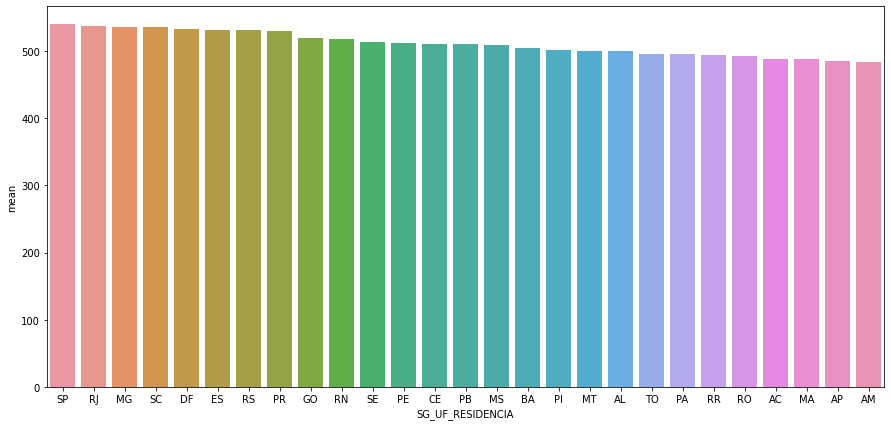

In [28]:
plt.figure(figsize=(15,7))
sns.barplot(x=alunos_notas_final['SG_UF_RESIDENCIA'], y= alunos_notas_final['mean'])
plt.show()

De acordo com IBGE e considerando o desempenho dos alunos, parece haver uma relação entre os índices sociais e as notas.<br>
<br>Faz sentido pensar que em uma residência que o aluno não tem um local adequado para estudar, será mais desafiador do que para um aluno que tem um local específico para essa atividade.<br>
<br>A ideia a seguir é utilizar um modelo preditivo para avaliar se é possível prever a nota do aluno em razão dos indicadores sociais.

In [29]:
colunas_sociais=['NU_NOTA_CN',
                 'NU_NOTA_CH',
                 'NU_NOTA_LC',
                 'NU_NOTA_MT',
                 'NU_NOTA_REDACAO',
                 'Q001',
                 'Q002',
                 'Q003',
                 'Q004',
                 'Q005',
                 'Q006',
                 'Q007',
                 'Q008',
                 'Q009',
                 'Q010',
                 'Q011',
                 'Q012',
                 'Q013',
                 'Q014',
                 'Q015',
                 'Q016',
                 'Q017',
                 'Q018',
                 'Q019',
                 'Q020',
                 'Q021',
                 'Q022',
                 'Q023',
                 'Q024',
                 'Q025']

In [30]:
sociais=dd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    sep=";",
    encoding='latin-1',
    usecols=colunas_sociais,
    dtype={
    'NU_NOTA_CN':'float64',
                 'NU_NOTA_CH':'float64',
                 'NU_NOTA_LC':'float64',
                 'NU_NOTA_MT':'float64',
                 'NU_NOTA_REDACAO':'float64',
                 'Q001':'category',
                 'Q002':'category',
                 'Q003':'category',
                 'Q004':'category',
                 'Q005':'int64',
                 'Q006':'category',
                 'Q007':'category',
                 'Q008':'category',
                 'Q009':'category',
                 'Q010':'category',
                 'Q011':'category',
                 'Q012':'category',
                 'Q013':'category',
                 'Q014':'category',
                 'Q015':'category',
                 'Q016':'category',
                 'Q017':'category',
                 'Q018':'category',
                 'Q019':'category',
                 'Q020':'category',
                 'Q021':'category',
                 'Q022':'category',
                 'Q023':'category',
                 'Q024':'category',
                 'Q025':'category'
    })

Nos passos a seguir, foi criada uma coluna com as médias dos alunos em todas as provas e transformado todas as colunas em categóricas, substituindo letras por números correspondentes.

In [31]:
sociais['media'] = sociais[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)

In [32]:
sociais=sociais.dropna()

In [33]:
sociais=sociais.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

Modelo de clusterização

Nesse ponto, a base foi dividida entre as variáveis independentes, que serão utilizadas para previsão (questões sociais) e a variável dependente, que será predita (média na prova). A parte das variaveis independentes será utilizada em um algoritmo de clusterização, buscando classificar os alunos em grupos com características semelhantes. Depois, as amostras serão divididas novamente, onde uma parte será utilizada para treino do modelo preditivo e outra para testar se os valores que estão sendo preditos para a média dos alunos está coerente.

In [34]:
X = sociais.drop(['media','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'],axis=1).compute()

In [35]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [36]:
k_means2 = KMeans(n_clusters=2, random_state=0)
k_means2.fit(X)
k_means2_labels = k_means2.labels_
k_means2_labels
k_means2_cluster_centers = k_means2.cluster_centers_
k_means2_cluster_centers

array([[-2.34556529e-01, -2.69261393e-01, -2.39920916e-01,
        -2.73847920e-01, -5.43774069e-03, -4.47334472e-01,
        -1.95612968e-01, -4.08632948e-01, -3.01943334e-01,
        -4.12161114e-01, -6.32477099e-04, -1.79860835e-01,
        -3.23951113e-01, -3.28499155e-01, -2.05218965e-01,
        -3.34546833e-01, -1.31538726e-01, -3.97857507e-01,
        -3.93036922e-01, -1.66836709e-01, -3.52117032e-01,
        -3.24324768e-01, -3.04452251e-01, -3.74156677e-01,
        -2.19654991e-01],
       [ 5.24018897e-01,  6.01552465e-01,  5.36003386e-01,
         6.11799151e-01,  1.21483674e-02,  9.99382612e-01,
         4.37015725e-01,  9.12920174e-01,  6.74566654e-01,
         9.20802391e-01,  1.41300672e-03,  4.01824145e-01,
         7.23733873e-01,  7.33894579e-01,  4.58476327e-01,
         7.47405597e-01,  2.93868512e-01,  8.88846937e-01,
         8.78077346e-01,  3.72727158e-01,  7.86658891e-01,
         7.24568649e-01,  6.80171785e-01,  8.35897300e-01,
         4.90727616e-01]])

No gráfico abaixo, é possível ver um exemplo de como os alunos foram divididos. Observando apenas as respostas 1 e 2, vemos que os alunos foram colocados em grupos distintos(cores diferentes). 

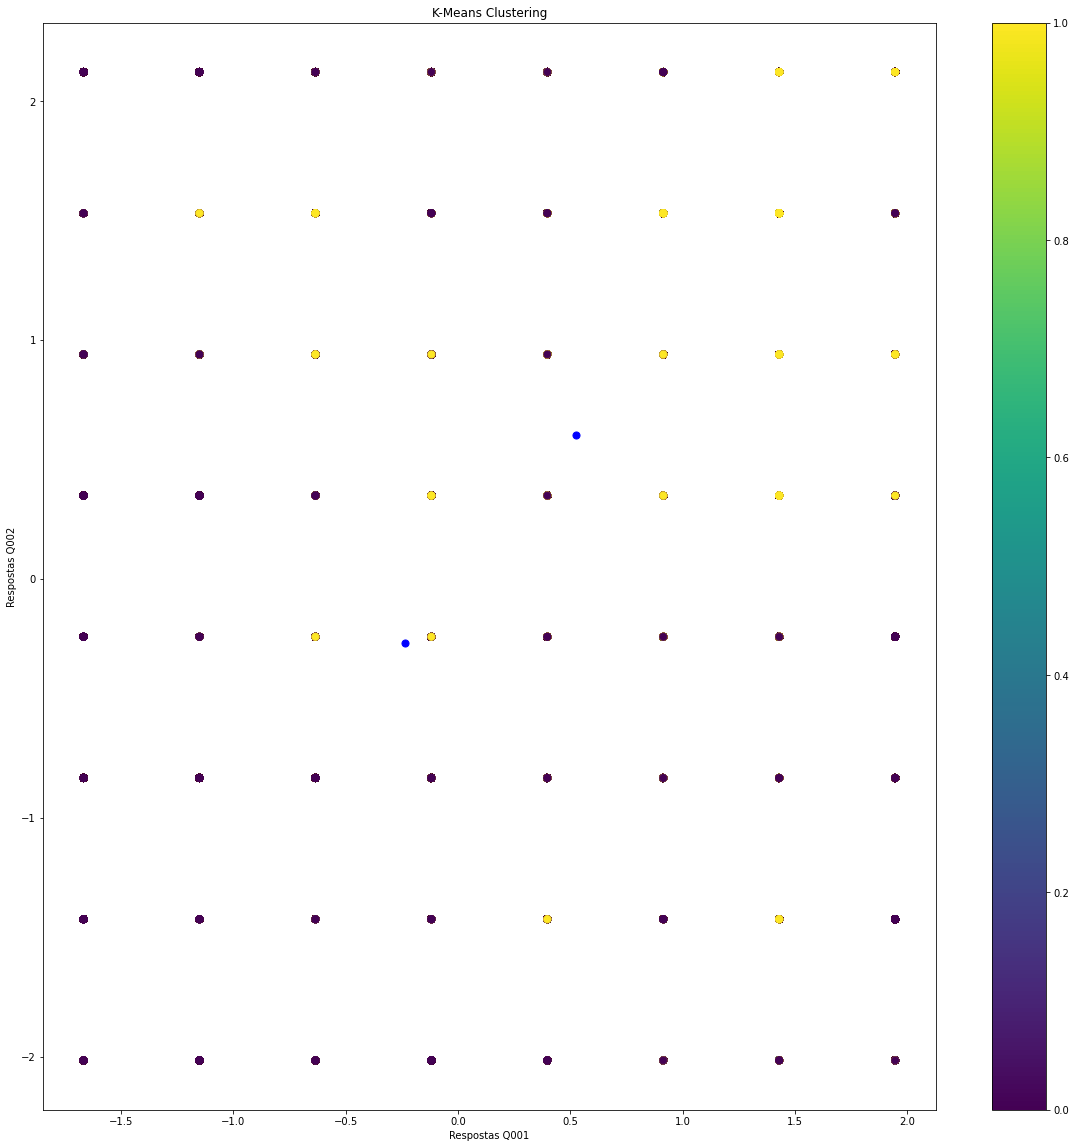

In [37]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(np.array(X)[:,0],np.array(X)[:,1],
                     c=k_means2_labels, s=50)
plt.scatter(k_means2_cluster_centers[:,0],k_means2_cluster_centers[:,1], c='blue', s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Respostas Q001')
ax.set_ylabel('Respostas Q002')
plt.colorbar(scatter)
plt.show()

Com os grupos criados, esses serão utilizados para realizar a análise preditiva.

Optou-se por utilizar uma árvore de decisão para gerar o modelo.

In [38]:
clf = tree.DecisionTreeRegressor()

In [39]:
y = sociais['media'].compute()
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(k_means2_labels), y, test_size=0.30, random_state=101)

In [40]:
clf = clf.fit(X_train, y_train)

In [41]:
predictions = clf.predict(X_test)

In [42]:
predictions[:10]

array([572.69471045, 500.16025468, 500.16025468, 500.16025468,
       500.16025468, 500.16025468, 500.16025468, 572.69471045,
       572.69471045, 500.16025468])

Calculando os valores dos erros, vemos que o modelo não performou muito bem.

In [43]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))

Mean squared error: 5879.65
Coefficient of determination: 0.16


In [44]:
df=pd.DataFrame(y_test)

In [45]:
df['train']=predictions

In [46]:
df['grupo']=X_train

In [47]:
df=df.dropna()

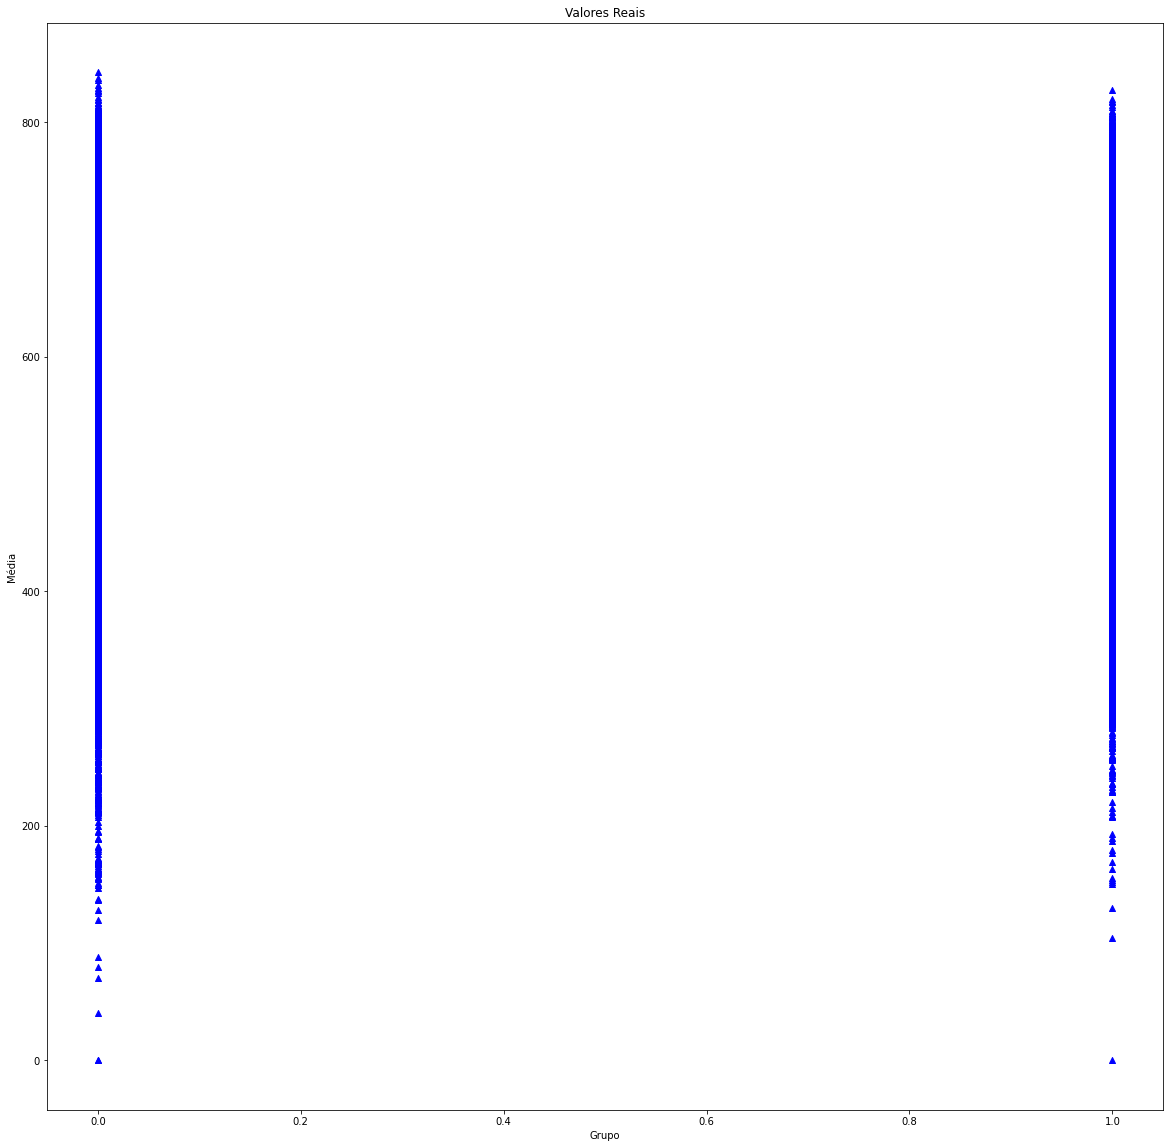

In [48]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
plt.scatter(df['grupo'],df['media'], c='blue',marker='^')
ax.set_title('Valores Reais')
ax.set_xlabel('Grupo')
ax.set_ylabel('Média')
plt.show()

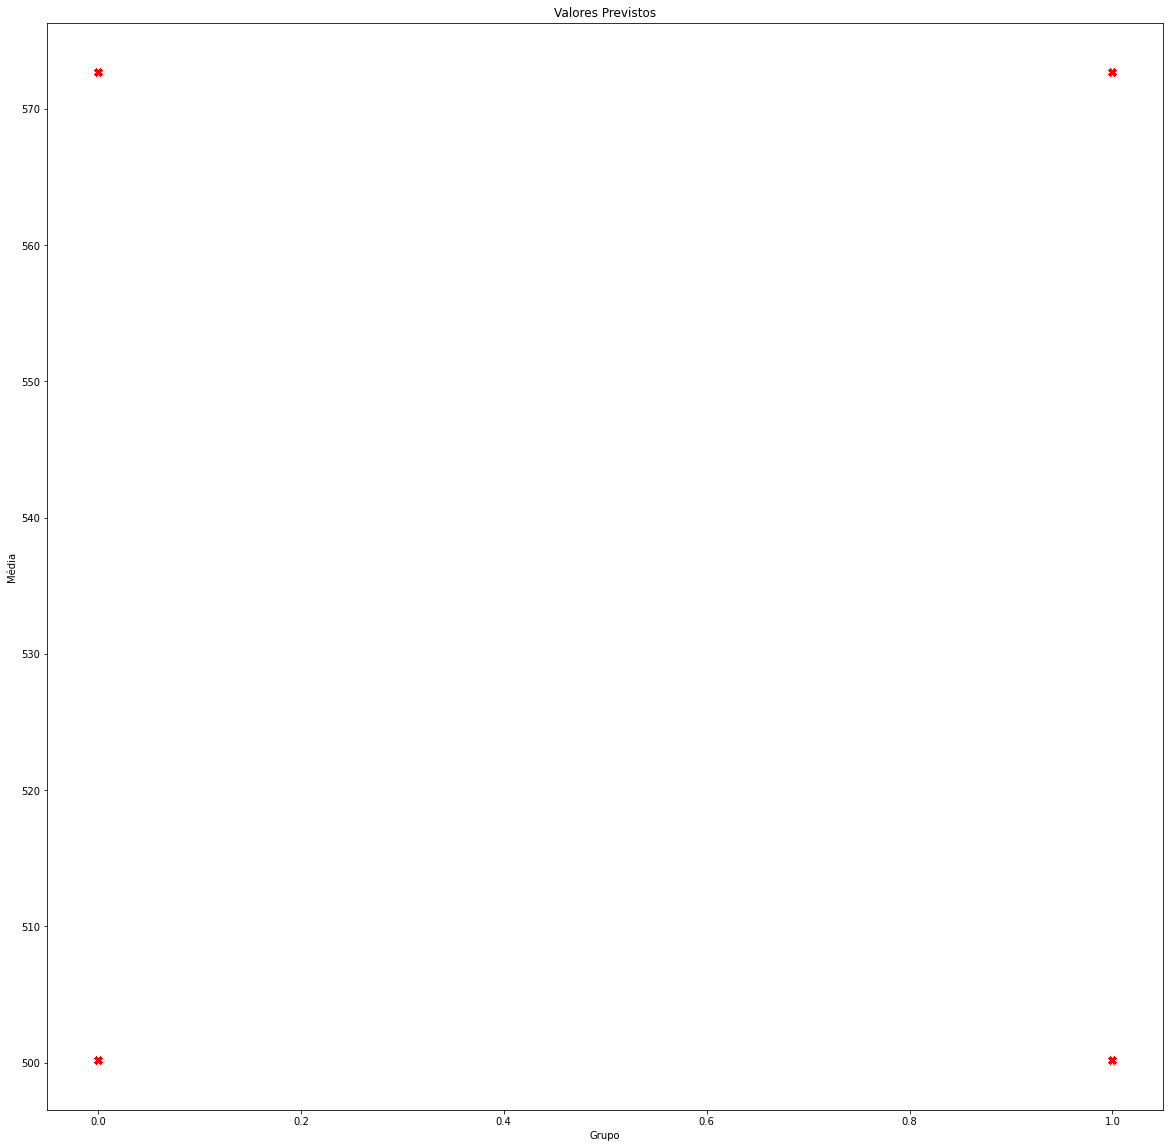

In [49]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
plt.scatter(df['grupo'],df['train'], c='red',marker='x')
ax.set_title('Valores Previstos')
ax.set_xlabel('Grupo')
ax.set_ylabel('Média')
plt.show()

Vemos que o modelo de classificação criou apenas dois grupos distintos e ao utilizar essa classificação para prever as notas com a árvore de decisão, foi obtido também apenas dois valores de notas.

### <a name=hipoteses>Hipóteses</a>
[Voltar ao índice](#indice)

Um dado importante que foi visto anteriormente é que mais mulheres fizeram a prova, em especial na faixa de 15 a 25 anos. Considerando que a população feminina é praticamente igual a masculina, é possível que algum fator externo influencie nessa diferença.
<br>De acordo com INEP², uma hipótese é que uma parcela maior de homens iniciam mais precocemente no mercado de trabalho e que isso pode acabar prejudicando seus estudos.
<br>Um outro ponto que preocupa, de acordo com INEP³, é que os homens também são minoria nos ensinos técnicos/profissionalizantes, o que leva a crer que muitos homens não prosseguem seus estudos após o ensino médio.
<br>
<br>Ao observarmos os dados, há um indício muito forte de que os indicadores sociais impactem diretamente no desempenho dos alunos na prova. Quando observamos todos os pontos, até mesmo a alimentação acaba sendo um desafio a mais para alguns alunos.

### <a name=conclusao>Conclusão</a>
[Voltar ao índice](#indice)

Ainda existem muitas discrepancias no Brasil. As diferenças sociais pressionam os alunos a ingressarem no mercado de trabalho jovens e isso parece prejudicar a continuidade dos estudos. Os dados indicam que essa pressão pode ser maior sobre os homens, que priorizam os trabalhos aos estudos.
<br>
<br>As diferenças de renda percapta e indicadores sociais como quantidade de pessoas na moradia, acesso a água, etc, também parecem ter um impacto sobre o desempenho nas provas.
<br>
<br>Ao utilizarmos os modelos de classificação e predição, vemos que ainda é necessário refinar o modelo para termos respostas mais concretas com relação ao assunto. Pode ser uma boa alternativa alterar os parâmetros dos modelos atuais ou até mesmo buscar outros algoritmos.


### <a name=referencias>Referências</a>
[Voltar ao índice](#indice)

<ol> 
    <li>INSTITUTO NACIONAL DE ESTUDOS E PESQUISAS EDUCACIONAIS ANÍSIO TEIXEIRA. Microdados do Enem 2019. Brasília: Inep, 2019. Disponível em: <a href='http://portal.inep.gov.br/web/guest/microdados'>http://portal.inep.gov.br/web/guest/microdados</a>. Acesso em: 8 dez. 2021.
    <li>INSTITUTO NACIONAL DE ESTUDOS E PESQUISAS EDUCACIONAIS ANÍSIO TEIXEIRA. Trabalho de crianças e adolescentes de 5 a 17 anos de idade 2016-2019. Brasília: Inep, 2019. Disponível em: <a href'https://biblioteca.ibge.gov.br/visualizacao/livros/liv101777_informativo.pdf'>https://biblioteca.ibge.gov.br/visualizacao/livros/liv101777_informativo.pdf</a>. Acesso em: 8 dez. 2021.
    <li>INSTITUTO NACIONAL DE ESTUDOS E PESQUISAS EDUCACIONAIS ANÍSIO TEIXEIRA. Censo da Educação Básica 2019. Brasília: Inep, 2019. Disponível em: <a href='https://download.inep.gov.br/publicacoes/institucionais/estatisticas_e_indicadores/resumo_tecnico_censo_da_educacao_basica_2019.pdf'>https://download.inep.gov.br/publicacoes/institucionais/estatisticas_e_indicadores/resumo_tecnico_censo_da_educacao_basica_2019.pdf</a>. Acesso em: 8 dez. 2021.
    <li>IBGE.Indicadores Sociais de Moradia no Contexto da Pré-Pandemia de COVID-19 2019.Rio de Janeiro : IBGE, 2020. Disponível em: <a href='https://biblioteca.ibge.gov.br/visualizacao/livros/liv101830.pdf'>https://biblioteca.ibge.gov.br/visualizacao/livros/liv101830.pdf</a>Acesso em: 8 dez. 2021. 